# **ML Project - Part 2 Build ML Model**

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd

# LOAD THE DATA
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
col_name = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url,names = col_name)


**Split the Dataset**

Before you build the model you need to think about how you are going to test the model that you build so that you can be sure that the model is giving you reliable answers to the question you are asking based on the training data given to it. The only way to test the model is to use some of the traning data samples as test samples. So the first thing you should do is split the data into a training dataset and a test dataset. You should not use the same dataset for training and testing.

In [2]:
# Drop the column that contains the class labels
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

# Split: 80% for training. 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1)

X shape: (150, 4) | y shape: (150,) 


**Train Classifier**

Now let us look at how we could build a Machine Learning model using the trainin dataset that we have. There are a lot of Machine Learning models that we can use in the scikit learn library, but for this project we will use a modle called the Support Vector Machine (SVM)

In the given code we are first importing Support Vector Classifier (SVC) from the svm library in scikit learn. Then we are creating our own SVC classifier object named svn. After that we ask the svn object to fit the trainng data and build a classificaition model (training).


In [3]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

**Evaluating Classifier**

Now you need to evaluate the classifier to make sure it is working the way we want it to work and giving us mostly correct answers. Also, by evaluating the classifier, we can try to improve the classifier by changing some of the things (design decisions) that we took in the process of building this classifier, including the data pre-processing steps we took. Evaluation allows us to check how well we have done the Machine Learning. Using the accuracy_score function provided by sklearn.metrics the classifier's performance is evaluated.

In [4]:
# Model evaluation
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

If you run the code you should see an output similar to what is given below. In this code we are first asking the model that we created named svn to do the predictions (classifications) for us for the X_test set and create predictions object. Then we are asking the results (predictions) to be evaluated aginast the correct answers we had in the original dataset in y_test.

**Detailed Evaluation with Precision, Recall and F1-Score**

There are multiple ways of evaluating a classification model. One of the easiest and simplest methods is to look at the accuracy calculated by dividing the correct numbers of labels we got from the total number of samples we tested. Other methods to evaluate would show us different aspects of the model quality. We have to decide on the most suitable evaluation method depending on the problem we are trying to solve. We will also check the Precision, Recall, and F1-Score in this example.

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

In the above code, we execute a classification_report function that is imported from sklearn.metrics and give the correct labels (y_test) and the labels predicted by our ML model (predictions). If you run the code you should see an output similar to what is given below

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



**Error Analysis with the Confusion Matrix**

In a multi-label classification problem like the one that we are solving, we can also check what classifications were incorrectly labeled by the classifier so that we may be able to give more attention to that class label in modifying our ML model. The summary table of True Label against the Predicted Label is called the Confusion Matrix.

If you run the code, you should see an output similar to what is given below. In the diagram, we see how the different labels have been predicted. For example, we see that most of the labels are predicted correctly as the numbers on the diagonal are high. We also see that one iris-versicolor was incorrectly labeled as Iris-verginica. Also, this diagram uses a heat map to show us the numbers with the color intensity. The more significant numbers are shown in yellow, and the smaller numbers are shown with a darker blue.

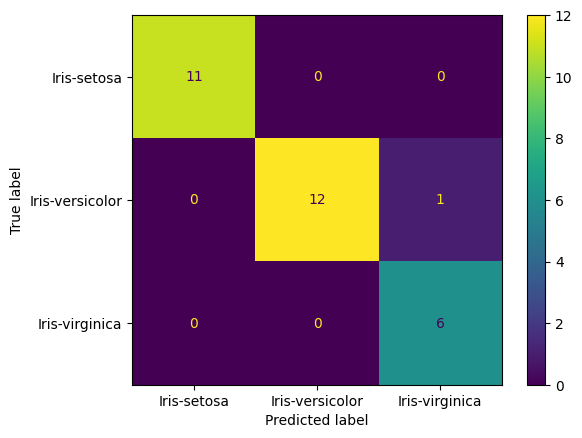

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, predictions, labels=svn.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svn.classes_)
disp.plot()
plt.show()

**Saving the ML Model**

Typically when we train a model with a large number of data points, it may take a long time, and once we build a good ML model, we would like to keep it and use it later rather than having to train the model again.


The pickle module is used to serialize/deserialize a python object structure so that it can be saved as a binary and loaded and used later. In this example, Serialize means converting the model to a form that can be stored in a storage media, and Deserializing is the process of reading the model from storage and putting it into a form that can be executed in the Python environment that it was built. This is similar to writing a file and reading it later.

In [7]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

**Loading and Using a Saved Model to Classify New Data**

Now that we have built a model and saved it, we can use it to predict a set of samples with unknown lables.


In [8]:
with open('SVM.pickle', 'rb') as f:
     model = pickle.load(f)
model.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)